# Introduction

For this project, you will act as a data researcher for the World Health Organization. You will investigate if there is a strong correlation between the economic output of a country and the life expectancy of its citizens.  


**Focusing Questions**: 
+ Has life expectancy increased over time in the six nations?
+ Has GDP increased over time in the six nations?
+ Is there a correlation between GDP and life expectancy of a country?
+ What is the average life expactancy in these nations?
+ What is the distribution of that life expectancy?

GDP Source:[World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD)national accounts data, and OECD National Accounts data files.

Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)


## Step 1. Import Python Modules

In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns


## Step 2 Prep The Data

load the datasets into DataFrames



In [4]:
df=pd.read_csv('all_data.csv')
df.head(20)

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10
5,Chile,2005,78.4,1.229650e+11
6,Chile,2006,78.9,1.547880e+11
7,Chile,2007,78.9,1.736060e+11
8,Chile,2008,79.6,1.796380e+11
9,Chile,2009,79.3,1.723890e+11


## Step 3 Examine The Data

Check how many countries are represented in the data

In [7]:
df.Country.unique()    # there are total 6 countries in the dataset

array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

Check the years are represented in the data

In [6]:
df.Year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015], dtype=int64)

## Step 4 Tweak The DataFrame

Look at the column names of the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
Country                             96 non-null object
Year                                96 non-null int64
Life expectancy at birth (years)    96 non-null float64
GDP                                 96 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


revise the column name

In [13]:
df.rename(columns={'Life expectancy at birth (years)':'LEABY'},inplace=True)

In [14]:
df.head()

,Country,Year,LEABY,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


---

## Step 5 Bar Charts To Compare Average

To take a first high level look at both datasets, create a bar chart for each DataFrame:

A) Create a bar chart from the data in `df` using `Country` on the x-axis and `GDP` on the y-axis. 


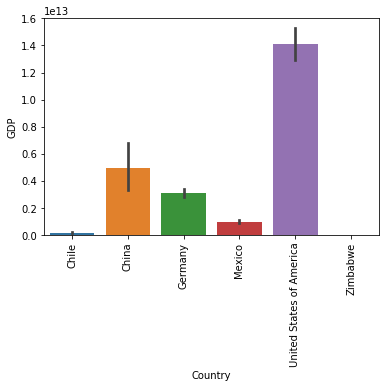

In [15]:
sns.barplot(x='Country',y='GDP',data=df)
plt.xticks(rotation=90)
plt.show()


B) Create a bar chart using the data in `df` with `Country` on the x-axis and `LEABY` on the y-axis.


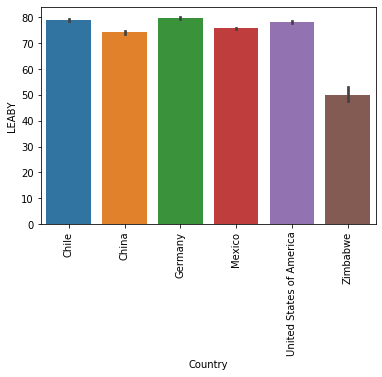

In [17]:
sns.barplot(x='Country',y='LEABY',data=df)
plt.xticks(rotation=90)
plt.show()

#### From above two plot we could see, although the avereage GDP is different in these six countries, the average life expectacy of these countries are almost same, except zimbabwe. Therefore, We couldn't conclude that there are relationship between GDP and life expectacy.


## Step 6. Violin Plots To Compare Life Expectancy Distributions 

Another way to compare two datasets is to visualize the distributions of each and to look for patterns in the shapes.

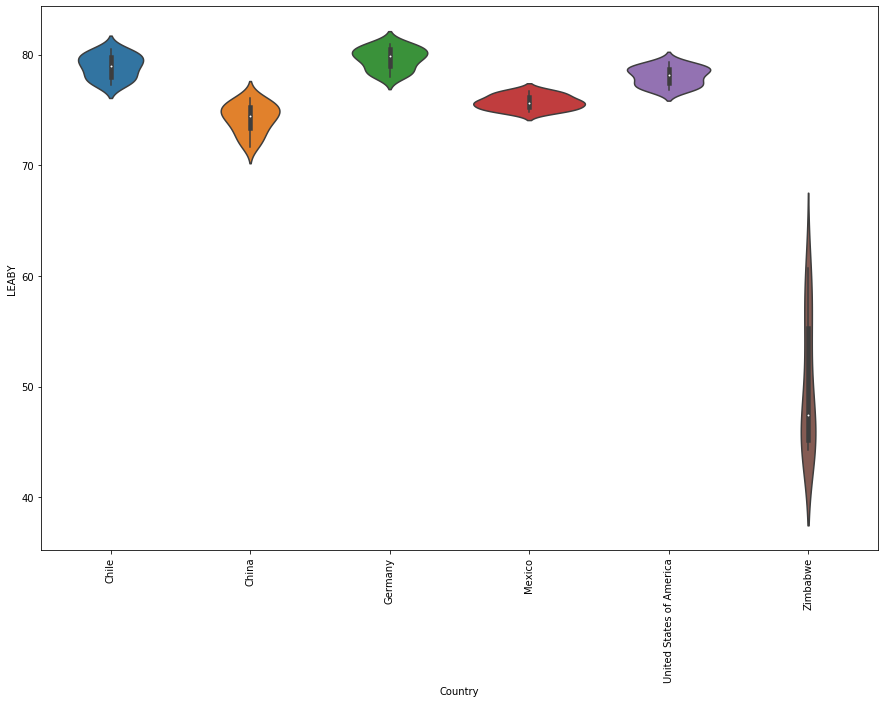

In [20]:
fig = plt.subplots(figsize=(15, 10)) 
sns.violinplot(x='Country',y='LEABY',data=df)
plt.xticks(rotation=90)
plt.show()

From the violin plot, we could see the range of life expactancy has changed most in Zimbabwe

## Step 7. Bar Plots Of GDP and Life Expectancy over time

We want to compare the GDPs of the countries over time, in order to get a sense of the relationship between GDP and life expectancy. 

First, can plot the progession of GDP's over the years by country in a barplot using Seaborn.
We have set up a figure with the correct dimensions for your plot. Under that declaration:
1. Save `sns.barplot()` to a variable named `ax`
2. Chart `Country` on the x axis, and `GDP` on the `Y` axis on the barplot. Hint: `ax = sns.barplot(x="Country", y="GDP")`
3. Use the `Year` as a `hue` to differentiate the 15 years in our data. Hint: `ax = sns.barplot(x="Country", y="GDP", hue="Year", data=df)`
4. Since the names of the countries are long, let's rotate their label by 90 degrees so that they are legible. Use `plt.xticks("rotation=90")`
5. Since our GDP is in trillions of US dollars, make sure your Y label reflects that by changing it to `"GDP in Trillions of U.S. Dollars"`. Hint: `plt.ylabel("GDP in Trillions of U.S. Dollars")`
6. Be sure to show your plot.


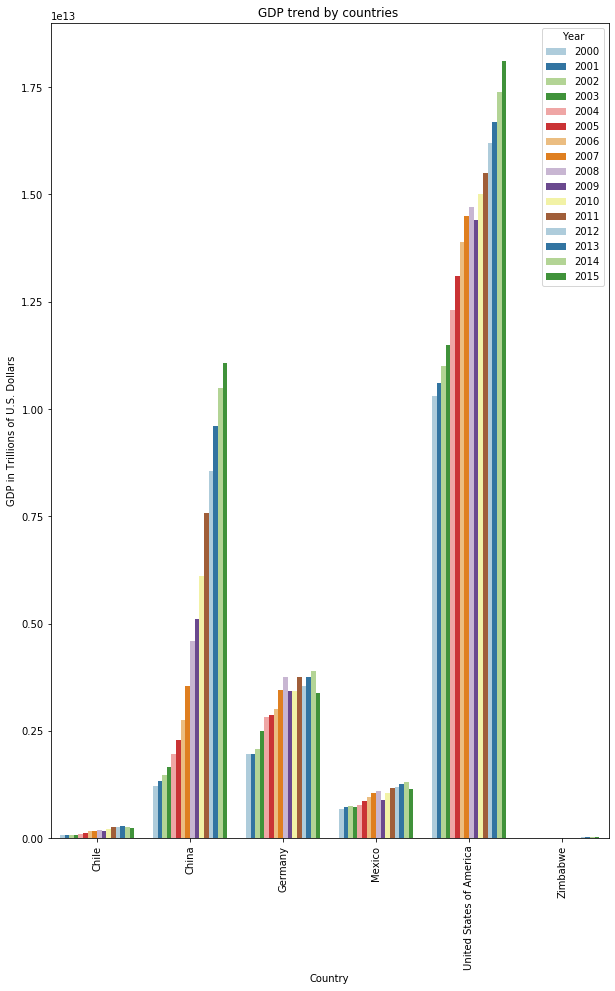

In [21]:
f, ax = plt.subplots(figsize=(10, 15)) 
ax=sns.barplot(x='Country',y='GDP',hue='Year',palette=sns.color_palette("Paired"),data=df)
plt.title('GDP trend by countries ')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('GDP in Trillions of U.S. Dollars')
plt.show()


Now that we have plotted a barplot that clusters GDP over time by Country, let's do the same for Life Expectancy.

The code will essentially be the same as above! The beauty of Seaborn relies in its flexibility and extensibility. Paste the code from above in the cell bellow, and: 
1. Change your `y` value to `LEABY` in order to plot life expectancy instead of GDP. Hint: `ax = sns.barplot(x="Country", y="LEABY", hue="Year", data=df)`
2. Tweak the name of your `ylabel` to reflect this change, by making the label `"Life expectancy at birth in years"` Hint: `ax.set(ylabel="Life expectancy at birth in years")`


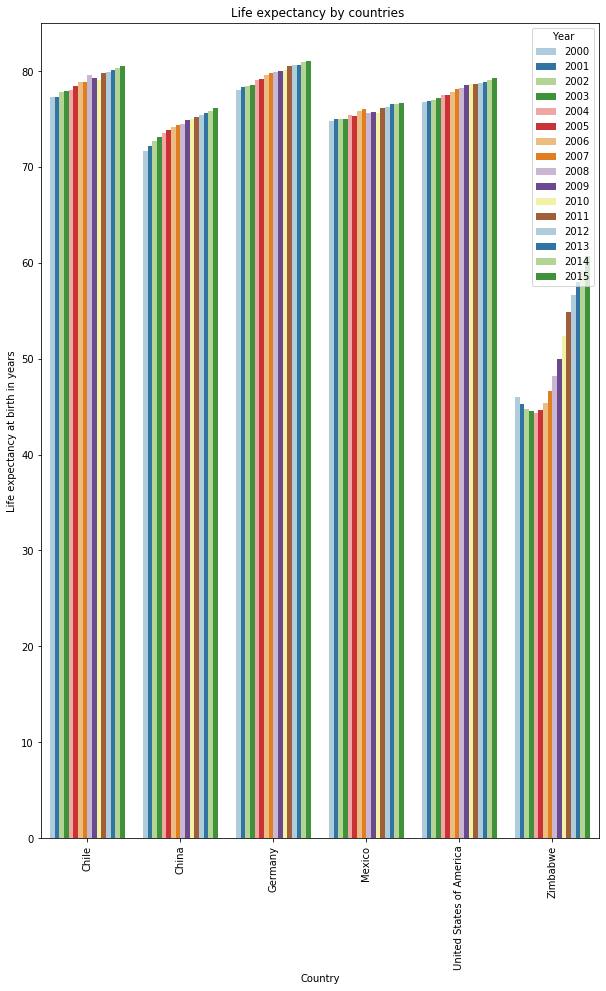

In [23]:
f, ax1 = plt.subplots(figsize=(10, 15)) 
ax1=sns.barplot(x='Country',y='LEABY',hue='Year',palette=sns.color_palette("Paired"),data=df)
plt.title('Life expectancy by countries ')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Life expectancy at birth in years')
plt.show()


From the GDP trend, we could see, all the countries show upward trend ( Zimbabwe's trend is not obviously, but still has slight increase) and China's GDP increase most from 2000 to 2015. As the increase of GDP, the life expectancy also increase

we could plot the line chart to check the trend more clearly

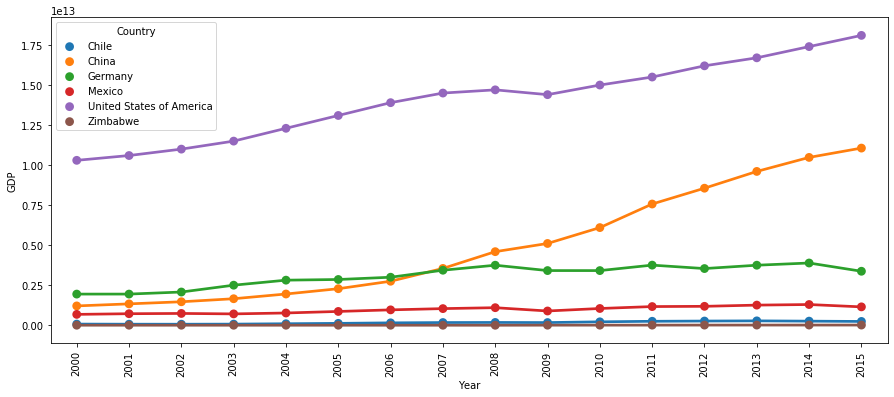

In [25]:
f, ax3 = plt.subplots(figsize=(15, 6)) 
ax3 = sns.pointplot(x="Year", y="GDP", hue = "Country", data=df)
plt.xticks(rotation=90)
plt.show()


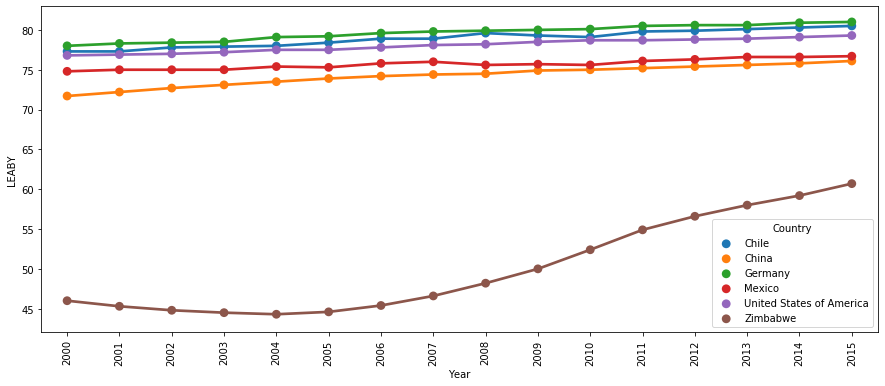

In [28]:
f, ax4 = plt.subplots(figsize=(15, 6)) 
ax4 = sns.pointplot(x="Year", y="LEABY", hue = "Country", data=df)
plt.xticks(rotation=90)
plt.show()

## Step 8. Scatter Plots of GDP and Life Expectancy Data

To create a visualization that will make it easier to see the possible correlation between GDP and life expectancy, you can plot each set of data on its own subplot, on a shared figure.

To create multiple plots for comparison, Seaborn has a special (function)[https://seaborn.pydata.org/generated/seaborn.FacetGrid.html] called `FacetGrid`. A FacetGrid takes in a function and creates an individual graph for which you specify the arguments!
    
1. In this graph, we want GDP on the X axis and Life Expectancy on the Y axis.
2. We want the columns to be split up for every Year in the data
3. We want the data points to be differentiated (hue) by Country.
4. We want to use a Matplotlib scatter plot to visualize the different graphs


C:\Users\yusha\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


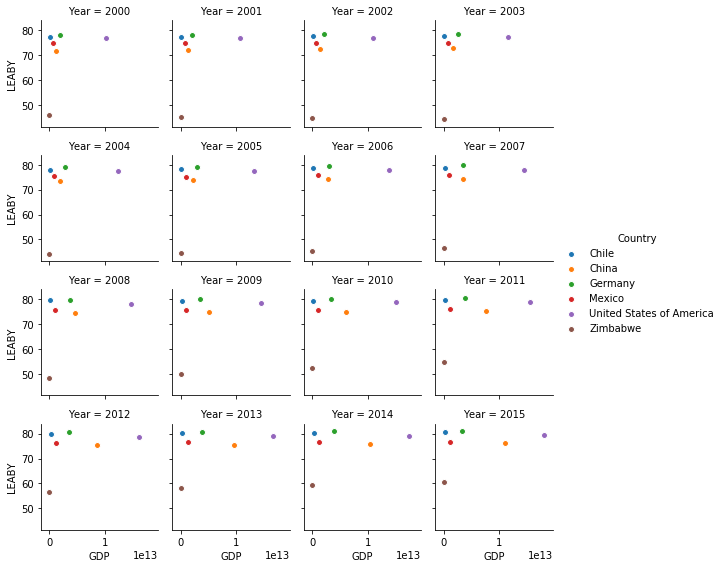

In [24]:
g=sns.FacetGrid(df,col='Year',hue='Country',col_wrap=4,size=2)
g=(g.map(plt.scatter,'GDP','LEABY',edgecolor='w').add_legend())
plt.show()


+ Which country moves the most along the X axis over the years?
+ Which country moves the most along the Y axis over the years?
+ Is this surprising?
+ Do you think these scatter plots are easy to read? Maybe there's a way to plot that! 

From above plot, china move most along the X axis over the years, zimbabwe move most among the y axis, but it's hard to isolate the change for GDP and Life expectancy


## Step 9. Line Plots for Life Expectancy

Let's check the line graph for each GDP and Life Expectancy by country. 

1. In this graph, we want Years on the X axis and Life Expectancy on the Y axis.
2. We want the columns to be split up by Country
3. We want to use a Matplotlib line plot to visualize the different graphs

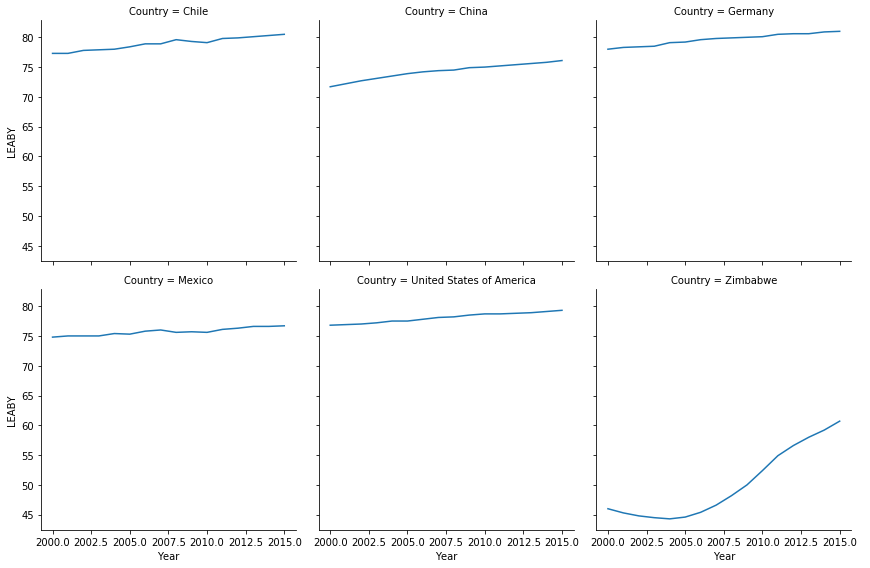

In [26]:
g3=sns.FacetGrid(df,col='Country',col_wrap=3,size=4)
g3=(g3.map(plt.plot,'Year','LEABY').add_legend())
plt.show()

## Step 10. Line Plots for GDP

Let's recreate the same FacetGrid for GDP now. 

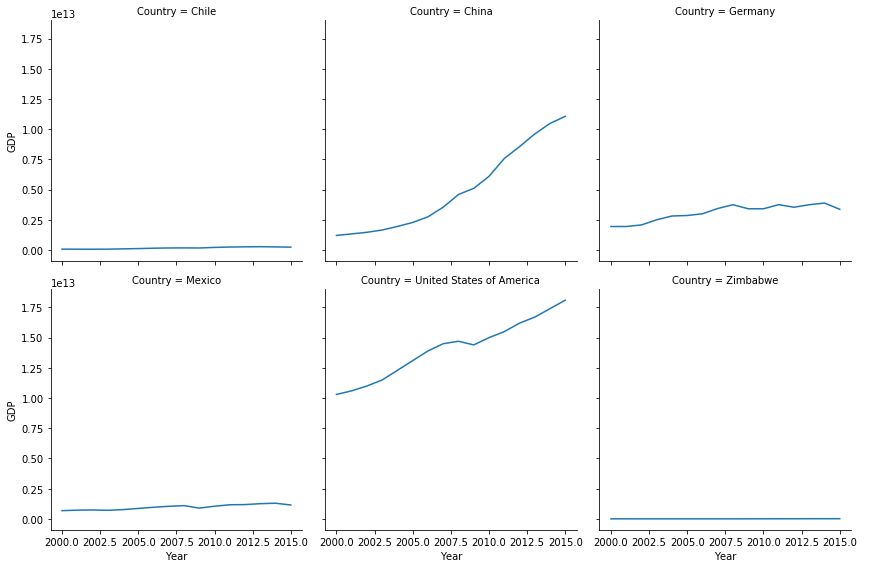

In [27]:
g4=sns.FacetGrid(df,col='Country',col_wrap=3,size=4)
g4=(g4.map(plt.plot,'Year','GDP').add_legend())
plt.show()

From above plots, we could see the relationship of GDP and life expectancy is weak. The Chile has comparably lower GPD, 
but the life expectancy is high. Zimbabwe has almost same GPD as Chile, but it's life expectancy is lowest.
For other countries, there is no clearly evidence that the growth of GDP contribute to the increase of life expectancy.
Therefore, we could conclude that GDP is not the only criteria for life expectancy. We need more data to 
deep into the reason, like enviroment, culture, income inequality.
